## 키워드 리뷰 수 -> 비율 변환

In [46]:
import pandas as pd
df = pd.read_csv('./final_df_summarized_임베딩완료(최종).csv')

keyword_columns = ['"음식이 맛있어요"', '"친절해요"', '"혼밥하기 좋아요"', '"가성비가 좋아요"', 
                   '"양이 많아요"', '"주차하기 편해요"', '"재료가 신선해요"', '"특별한 메뉴가 있어요"', 
                   '"매장이 청결해요"', '"화장실이 깨끗해요"', '"고기 질이 좋아요"', '"매장이 넓어요"', 
                   '"잡내가 적어요"', '"단체모임 하기 좋아요"', '"뷰가 좋아요"', '"차분한 분위기에요"', 
                   '"컨셉이 독특해요"', '"인테리어가 멋져요"', '"특별한 날 가기 좋아요"','"음식이 빨리 나와요"', '"건강한 맛이에요"',
                   '"아늑해요"', '"메뉴 구성이 알차요"', '"포장이 깔끔해요"', '"커피가 맛있어요"', '"음료가 맛있어요"',
                   '"디저트가 맛있어요"', '"대화하기 좋아요"', '"반찬이 잘 나와요"','"좌석이 편해요"','"집중하기 좋아요"',
                   '"직접 잘 구워줘요"', '"아이와 가기 좋아요"', '"환기가 잘 돼요"', '"야외 공간이 멋져요"',
                   '"향신료가 강하지 않아요"', '"현지 맛에 가까워요"', '"사진이 잘 나와요"', '"오래 머무르기 좋아요"', '"비싼 만큼 가치있어요"',
                   '"반려동물과 가기 좋아요"', '"음악이 좋아요"','"술이 다양해요"', '"기본 안주가 좋아요"',
                   '"혼술하기 좋아요"','"종류가 다양해요"',  '"선물하기 좋아요"', '"주문제작을 잘해줘요"',
                   '"빵이 맛있어요"', '"읽을만한 책이 많아요"', '"룸이 잘 되어있어요"', '"코스요리가 알차요"', '"차가 맛있어요"',
                   '"샐러드바가 잘 되어있어요"', '"라이브공연이 훌륭해요"','"파티하기 좋아요"']

keywordreview = df[keyword_columns]

keywordreview = keywordreview.dropna()

keywordreview['totalnum'] = df[keyword_columns].sum(axis = 1)

for column in keywordreview.columns[:-1]:  # totalnum 열 제외
    keywordreview[column] = keywordreview[column] / keywordreview['totalnum']

import numpy as np
from scipy.stats import percentileofscore

def convert_to_percentile(column):
    return column.apply(lambda x: percentileofscore(column, x))

for column in keywordreview.columns[:-1]:
    keywordreview[column] = convert_to_percentile(keywordreview[column])
    
    
keywordreview = keywordreview.drop('totalnum', axis = 1)

In [47]:
keywordreview

,"""음식이 맛있어요""","""친절해요""","""혼밥하기 좋아요""","""가성비가 좋아요""","""양이 많아요""","""주차하기 편해요""","""재료가 신선해요""","""특별한 메뉴가 있어요""","""매장이 청결해요""","""화장실이 깨끗해요""",...,"""선물하기 좋아요""","""주문제작을 잘해줘요""","""빵이 맛있어요""","""읽을만한 책이 많아요""","""룸이 잘 되어있어요""","""코스요리가 알차요""","""차가 맛있어요""","""샐러드바가 잘 되어있어요""","""라이브공연이 훌륭해요""","""파티하기 좋아요"""
0,62.022293,71.496815,91.162420,62.659236,65.963376,99.920382,54.378981,37.101911,44.108280,92.914013,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
1,73.805732,33.439490,90.923567,64.490446,82.006369,99.203822,61.385350,35.668790,37.340764,56.050955,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
2,80.891720,99.920382,75.636943,60.350318,66.958599,82.484076,61.146497,27.547771,40.605096,62.539809,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
3,58.240446,64.012739,92.356688,94.108280,76.035032,33.558917,58.678344,27.149682,40.286624,55.812102,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
4,63.853503,25.796178,91.082803,67.356688,74.363057,33.558917,87.261146,30.493631,63.415605,26.114650,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,77.786624,28.901274,97.611465,88.136943,59.633758,72.929936,56.369427,48.168790,38.375796,66.799363,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
1261,20.780255,44.984076,27.189490,61.783439,44.585987,33.558917,44.028662,97.929936,96.735669,26.114650,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
1262,81.926752,12.977707,85.668790,65.923567,93.630573,71.058917,52.866242,40.843949,38.176752,73.168790,...,48.925159,49.164013,47.41242,49.840764,48.527070,48.367834,49.044586,49.920382,49.800955,49.482484
1263,45.222930,27.149682,60.071656,38.773885,59.355096,90.127389,57.802548,52.468153,71.735669,78.343949,...,48.925159,49.164013,47.41242,49.840764,99.840764,48.367834,49.044586,49.920382,49.800955,49.482484


## TPO별 주요 키워드 리뷰 선정
- 총 6개의 TPO (회식, 데이트 및 소개팅, 혼밥, 밥약, 카공, 맛집 탐방) 

### 키워드리뷰 비율 시각화
-  TPO별 추천 음식점 리스트를 필터링하기 위한 비율 커트라인 선정

In [49]:
df = pd.read_csv('./final_df_0327.csv')

C:\Users\thdth\AppData\Local\Temp\ipykernel_13036\1700422159.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['특별한 메뉴가 있어요'], shade=True)


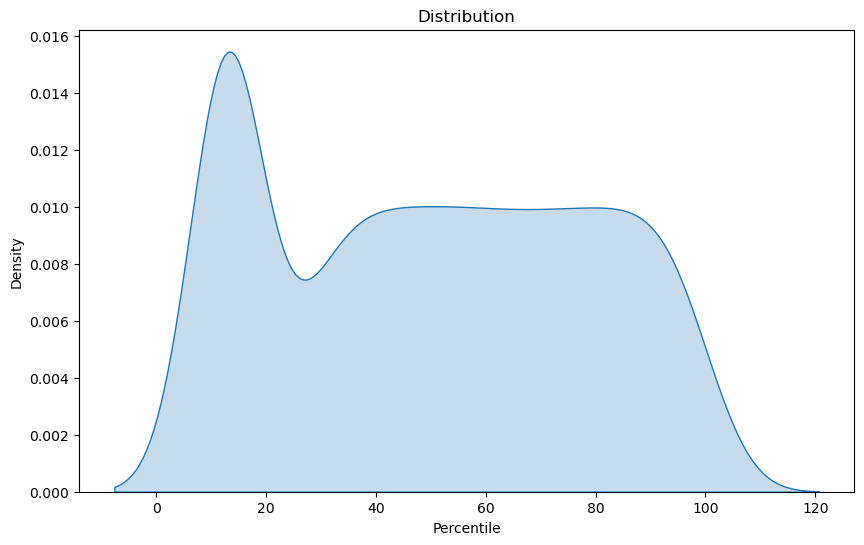

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['특별한 메뉴가 있어요'], shade=True)
plt.title('Distribution')
plt.xlabel('Percentile')
plt.ylabel('Density')
plt.show()

## TPO별 추천 음식점 리스트 선정

### TPO1. 회식장소 리스트

In [51]:
drop_conditions = ['커피/차', '디저트', '간식', '도시락']
df = df[~df['new_category'].isin(drop_conditions)]

kokkiribab = df[df['양이 많아요'] > 40]
partyppl = df[df['단체모임 하기 좋아요'] > 50]
bigplace = df[df['매장이 넓어요'] > 50]

intersection = pd.merge(kokkiribab, partyppl, how='inner')
intersection = pd.merge(intersection, bigplace, how='inner')

### TPO2. 데이트 및 소개팅 장소 리스트

In [54]:
special = df[df['특별한 메뉴가 있어요'] > 20]
interior = df[df['인테리어가 멋져요'] > 40]
goodday = df[df['특별한 날 가기 좋아요'] > 60]
conversation = df[df['대화하기 좋아요'] > 60]

date = pd.concat([special, interior, goodday])
date = date.drop_duplicates()
date = date[date['restaurant_name'].isin(conversation['restaurant_name'])]

### TPO3. 혼밥 장소 리스트

In [55]:
import pandas as pd

df = pd.read_csv('0626_final_df_0244.csv')

price = df[df['가성비가 좋아요'] > 50]
fast = df[df['음식이 빨리 나와요'] > 60]

# 'price'와 'fast'의 합집합 생성
combined = pd.concat([price, fast]).drop_duplicates()

# 'alone' 데이터프레임 생성
alone = df[df['혼밥하기 좋아요'] > 80]

# 'combined'와 'alone'의 교집합 생성
result = pd.merge(combined, alone, how='inner')

### TPO4. 밥약 장소 리스트

In [56]:
buck = df[df['가성비가 좋아요'] > 60]
conversation = df[df['대화하기 좋아요'] > 60]
fast = df[df['음식이 빨리 나와요'] > 60]
babak = pd.concat([conversation, fast])
babak = babak.drop_duplicates()
babak = babak[(~babak['new_category'].isin(['커피/차', '디저트']))]
babak = babak[babak['restaurant_name'].isin(buck['restaurant_name'])]

### TPO5. 카공 장소 리스트

In [57]:
concentrate = df[df['집중하기 좋아요'] > 60]
comfort = df[df['좌석이 편해요'] > 60]
kagong = pd.concat([concentrate, comfort])
kagong = kagong.drop_duplicates()
kagong = kagong[kagong['new_category'].isin(['커피/차', '디저트'])] 

### TPO6. 맛집 탐방 장소 리스트

In [58]:
mat = df[df['음식이 맛있어요'] > 50]
special_menu = df[df['특별한 메뉴가 있어요'] > 25]
meat = df[df['고기 질이 좋아요'] > 75]
local = df[df['현지 맛에 가까워요'] > 85]

taste = pd.concat([special, interior, goodday, conversation])
taste = taste.drop_duplicates()
taste = taste[taste['restaurant_name'].isin(mat['restaurant_name'])]